### Importing Libraries and Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("fraud_oracle.csv")

pd.set_option('display.max_columns', None)
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [4]:
df.shape

(15420, 33)

### Exploraatory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

/var/folders/xh/l2hw6tyj0xl_sf84yjr9xdxc0000gn/T/ipykernel_25186/4033007796.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='FraudFound_P', palette='viridis')


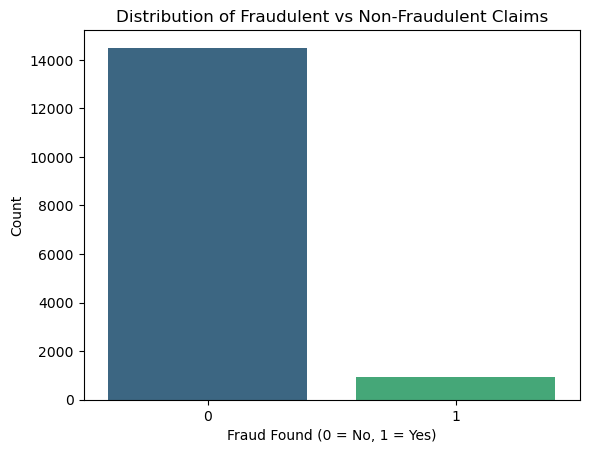

In [7]:
sns.countplot(data=df, x='FraudFound_P', palette='viridis')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Claims')
plt.xlabel('Fraud Found (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.savefig('distribution_of_fraudulent.png', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/xh/l2hw6tyj0xl_sf84yjr9xdxc0000gn/T/ipykernel_25186/3419005419.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='VehicleCategory', palette='muted')


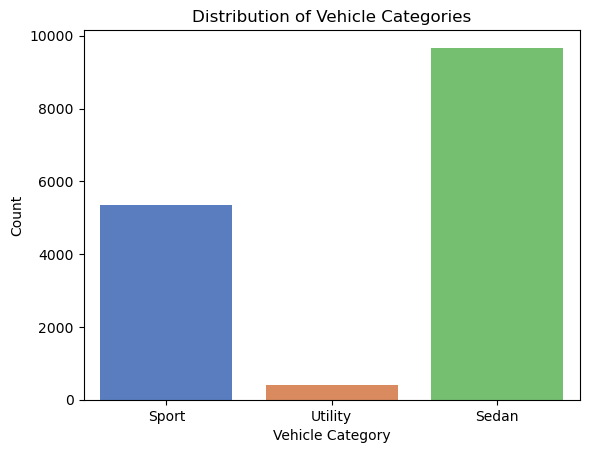

In [8]:
sns.countplot(data=df, x='VehicleCategory', palette='muted')
plt.title('Distribution of Vehicle Categories')
plt.xlabel('Vehicle Category')
plt.ylabel('Count')
plt.xticks()
plt.show()

<Axes: xlabel='FraudFound_P', ylabel='count'>

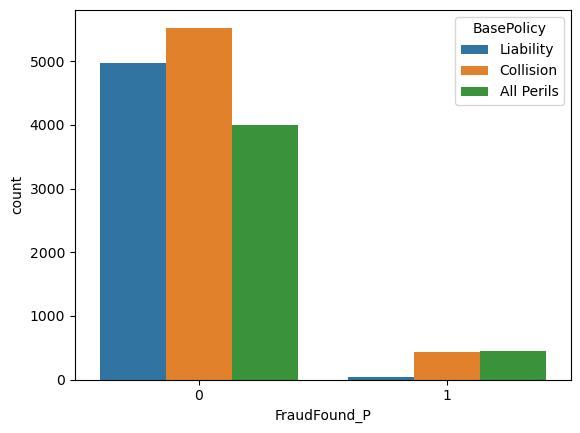

In [9]:
sns.countplot(data=df, x="FraudFound_P", hue="BasePolicy")
#Liability BasePolicy are unlikely to do fraud vehicle insurance claim

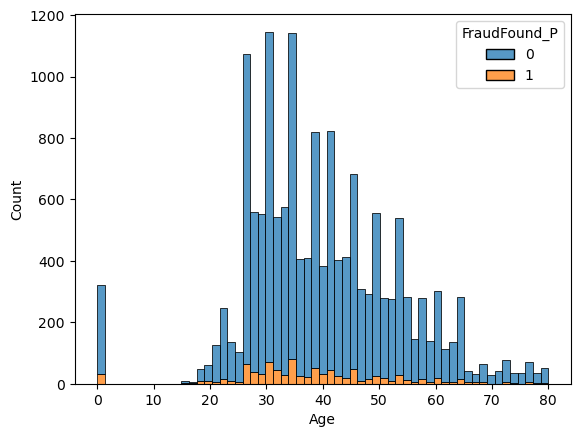

In [10]:
sns.histplot(data=df, x="Age", hue="FraudFound_P", multiple="stack")
plt.savefig('histogram_plot.png')

<Axes: xlabel='FraudFound_P', ylabel='count'>

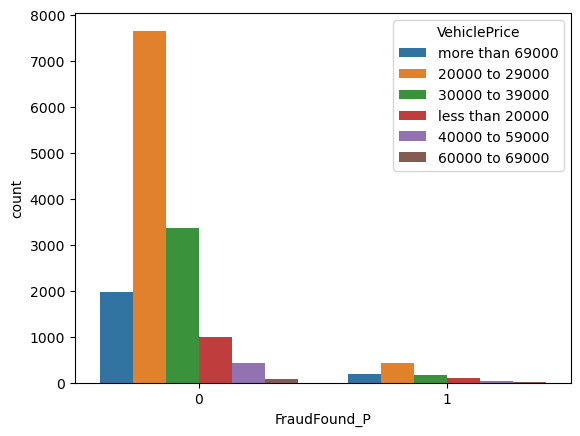

In [11]:
sns.countplot(data=df, x="FraudFound_P", hue="VehiclePrice")

<Axes: xlabel='FraudFound_P', ylabel='count'>

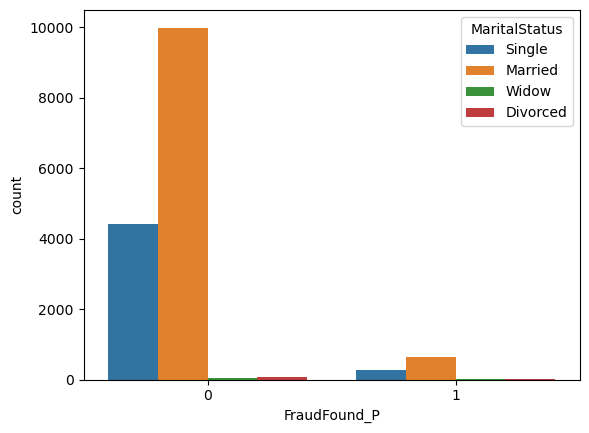

In [12]:
sns.countplot(data=df, x="FraudFound_P", hue="MaritalStatus")

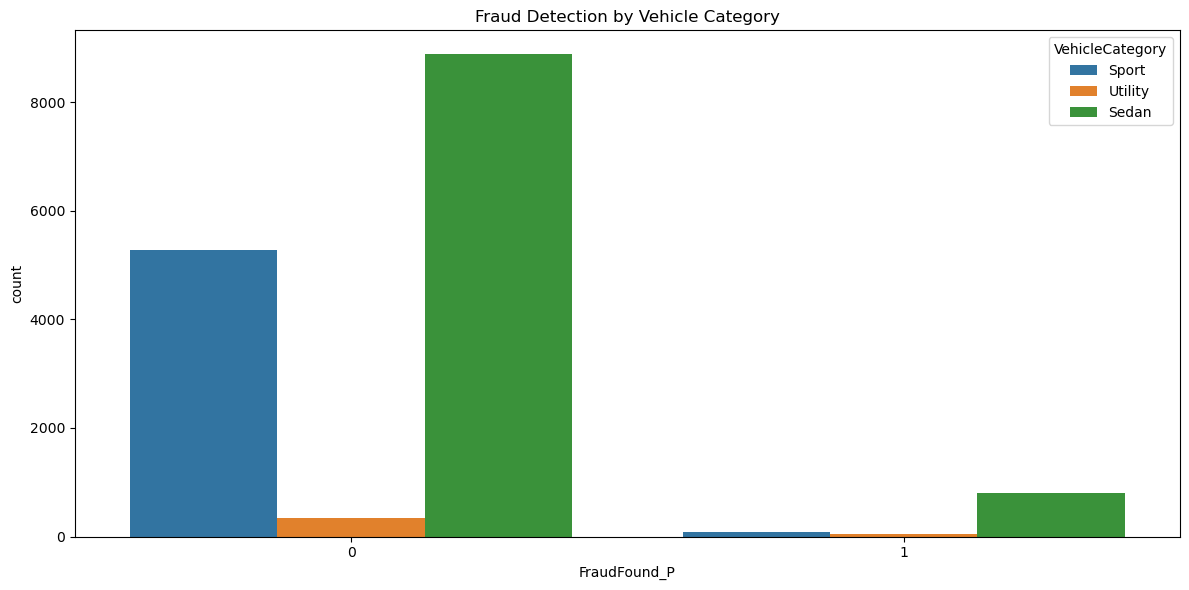

In [13]:
# Create the plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="FraudFound_P", hue="VehicleCategory")
plt.title('Fraud Detection by Vehicle Category')
plt.tight_layout()  # Ensure labels don't overlap

# Save the plot as PNG
plt.savefig('fraud_detection_by_vehicle_category.png', dpi=300, bbox_inches='tight')

# Optionally, display the plot in the notebook
plt.show()


<Axes: xlabel='FraudFound_P', ylabel='count'>

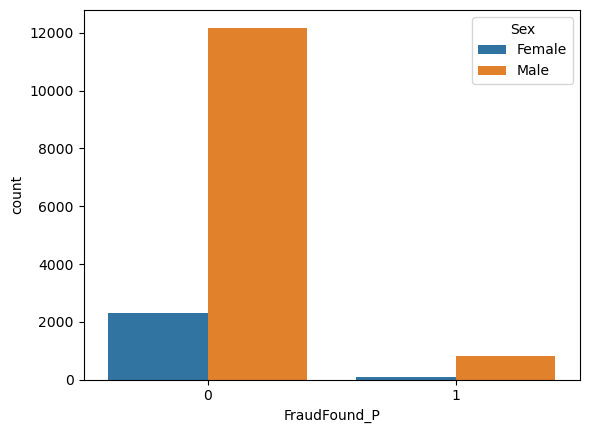

In [14]:
sns.countplot(data=df, x="FraudFound_P", hue="Sex")

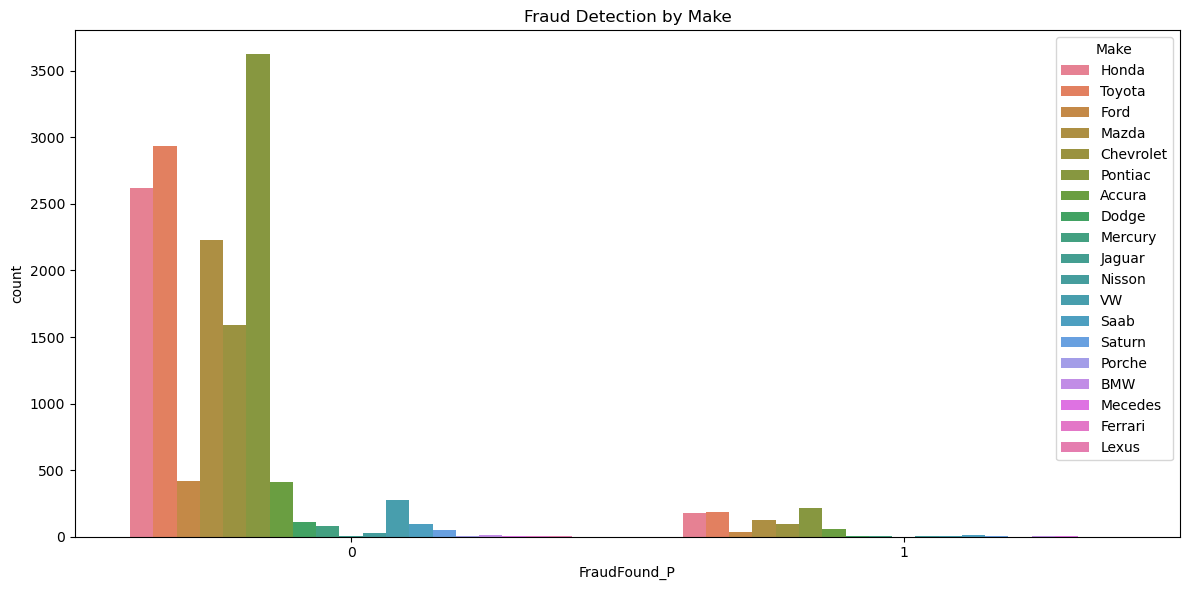

In [15]:
# Create the plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="FraudFound_P", hue="Make")
plt.title('Fraud Detection by Make')
plt.tight_layout()  # Prevent overlapping labels

# Save the plot as PNG
plt.savefig('fraud_detection_by_make.png', dpi=300, bbox_inches='tight')

# Optionally, display the plot in the notebook
plt.show()


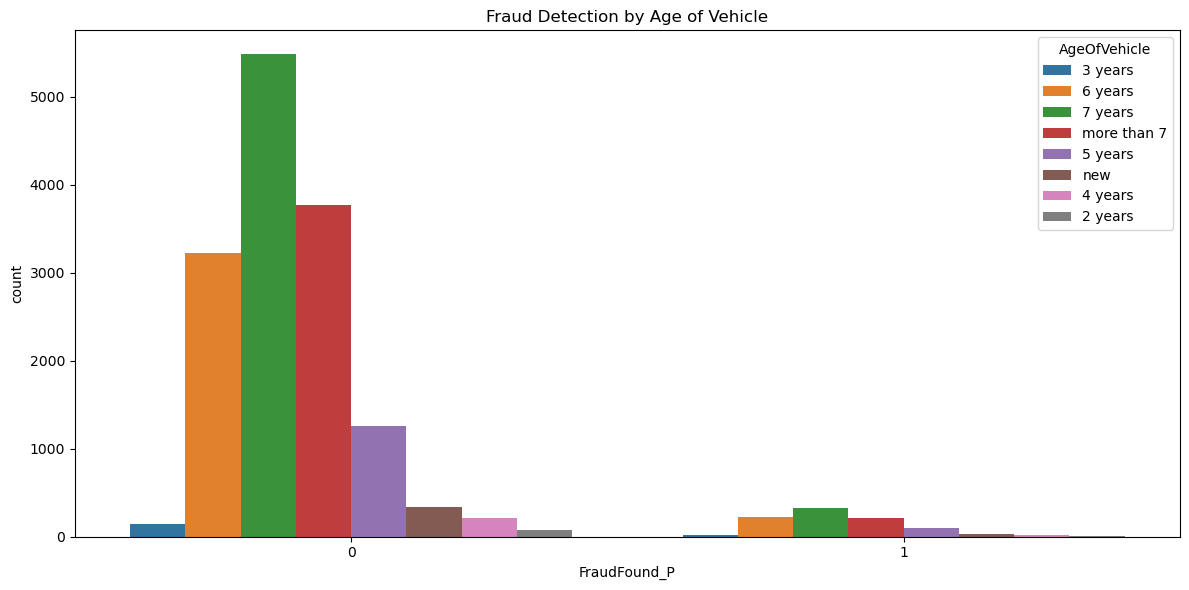

In [16]:
# Create the plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="FraudFound_P", hue="AgeOfVehicle")
plt.title('Fraud Detection by Age of Vehicle')
plt.tight_layout()  # Prevent overlapping labels

plt.savefig('fraud_detection_by_age_of_vehicle.png', dpi=300, bbox_inches='tight')

plt.show()

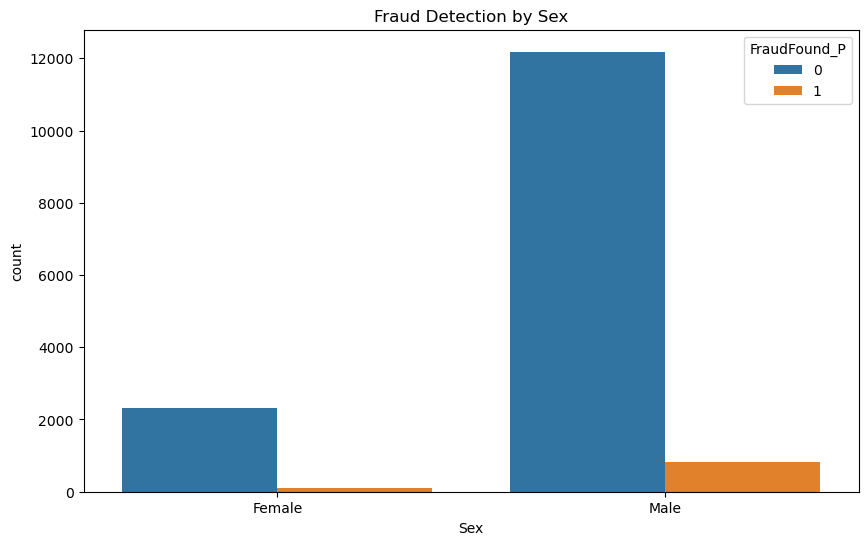

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sex', hue='FraudFound_P', data=df)
plt.title('Fraud Detection by Sex')
plt.show()

### Preprocessing Dataset

In [19]:
import re
df['VehiclePrice'] = df['VehiclePrice'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else None)

The code is used for cleaning and preprocessing the VehiclePrice column, which might contain numeric values embedded within strings (e.g., "Price: $1000"). After applying this transformation:
1. Only the numeric part of each entry remains as an integer.
2. Entries without numeric content are replaced with None.

In [21]:
df['VehiclePrice'].dtype

dtype('int64')

In [22]:
df['NumberOfCars'].unique()

array(['3 to 4', '1 vehicle', '2 vehicles', '5 to 8', 'more than 8'],
      dtype=object)

In [23]:
df['Make'].unique()

array(['Honda', 'Toyota', 'Ford', 'Mazda', 'Chevrolet', 'Pontiac',
       'Accura', 'Dodge', 'Mercury', 'Jaguar', 'Nisson', 'VW', 'Saab',
       'Saturn', 'Porche', 'BMW', 'Mecedes', 'Ferrari', 'Lexus'],
      dtype=object)

In [24]:
df.drop(columns=['WeekOfMonthClaimed'], inplace = True)

In [25]:
df['AgeOfVehicle'].unique()

array(['3 years', '6 years', '7 years', 'more than 7', '5 years', 'new',
       '4 years', '2 years'], dtype=object)

In [26]:
age_mapping = {
    'new': 0,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    'more than 7': 8  # Assign 8 to represent "more than 7"
}

# Map the values in 'AgeOfVehicle' using the dictionary
df['AgeOfVehicle'] = df['AgeOfVehicle'].map(age_mapping)

In [27]:
df['AgentType'].unique()

array(['External', 'Internal'], dtype=object)

In [28]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,Female,Single,21,Policy Holder,Sport - Liability,Sport,69000,0,1,12,300,1,more than 30,more than 30,none,3,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,Male,Single,34,Policy Holder,Sport - Collision,Sport,69000,0,2,15,400,4,more than 30,more than 30,none,6,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,Male,Married,47,Policy Holder,Sport - Collision,Sport,69000,0,3,7,400,3,more than 30,more than 30,1,7,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,Male,Married,65,Third Party,Sedan - Liability,Sport,20000,0,4,4,400,2,more than 30,more than 30,1,8,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,Female,Single,27,Third Party,Sport - Collision,Sport,69000,0,5,3,400,1,more than 30,more than 30,none,5,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [29]:
label_encoder_cols = ['Month', 'DayOfWeek', 'Make', 'DayOfWeekClaimed', 'MonthClaimed', 'MaritalStatus', 'PolicyType', 'VehicleCategory', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfPolicyHolder', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars']
one_hot_encoding_cols = ['AccidentArea', 'Sex', 'AgentType', 'Fault', 'PoliceReportFiled', 'WitnessPresent', 'BasePolicy']

In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in label_encoder_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder for future use if needed

In [31]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,2,5,6,6,Urban,6,5,Female,2,21,Policy Holder,5,1,69000,0,1,12,300,1,3,2,3,3,3,No,No,External,3,0,2,1994,Liability
1,4,3,6,6,Urban,2,5,Male,2,34,Policy Holder,4,1,69000,0,2,15,400,4,3,2,3,6,4,Yes,No,External,3,3,0,1994,Collision
2,10,5,0,6,Urban,5,10,Male,1,47,Policy Holder,4,1,69000,0,3,7,400,3,3,2,0,7,6,No,No,External,3,3,0,1994,Collision
3,6,2,2,17,Rural,1,6,Male,1,65,Third Party,2,1,20000,0,4,4,400,2,3,2,0,8,7,Yes,No,External,2,3,0,1994,Liability
4,4,5,1,6,Urban,6,4,Female,2,27,Third Party,4,1,69000,0,5,3,400,1,3,2,3,5,4,No,No,External,3,3,0,1994,Collision


In [32]:
df = pd.get_dummies(df, columns=one_hot_encoding_cols, drop_first=True)

In [33]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,DayOfWeekClaimed,MonthClaimed,MaritalStatus,Age,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,AccidentArea_Urban,Sex_Male,AgentType_Internal,Fault_Third Party,PoliceReportFiled_Yes,WitnessPresent_Yes,BasePolicy_Collision,BasePolicy_Liability
0,2,5,6,6,6,5,2,21,5,1,69000,0,1,12,300,1,3,2,3,3,3,3,0,2,1994,True,False,False,False,False,False,False,True
1,4,3,6,6,2,5,2,34,4,1,69000,0,2,15,400,4,3,2,3,6,4,3,3,0,1994,True,True,False,False,True,False,True,False
2,10,5,0,6,5,10,1,47,4,1,69000,0,3,7,400,3,3,2,0,7,6,3,3,0,1994,True,True,False,False,False,False,True,False
3,6,2,2,17,1,6,1,65,2,1,20000,0,4,4,400,2,3,2,0,8,7,2,3,0,1994,False,True,False,True,True,False,False,True
4,4,5,1,6,6,4,2,27,4,1,69000,0,5,3,400,1,3,2,3,5,4,3,3,0,1994,True,False,False,True,False,False,True,False


In [34]:
from sklearn.preprocessing import StandardScaler

columns_to_standardize = [
    "Age", "VehiclePrice", "Deductible", "Year"
]

# Initialize the scaler
scaler = StandardScaler()

# Apply standardization
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Display the standardized DataFrame
print("\nStandardized DataFrame:")
df.head()


Standardized DataFrame:


,Month,WeekOfMonth,DayOfWeek,Make,DayOfWeekClaimed,MonthClaimed,MaritalStatus,Age,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,AccidentArea_Urban,Sex_Male,AgentType_Internal,Fault_Third Party,PoliceReportFiled_Yes,WitnessPresent_Yes,BasePolicy_Collision,BasePolicy_Liability
0,2,5,6,6,6,5,2,-1.397554,5,1,2.326977,0,1,12,-2.450633,1,3,2,3,3,3,3,0,2,-1.078658,True,False,False,False,False,False,False,True
1,4,3,6,6,2,5,2,-0.434015,4,1,2.326977,0,2,15,-0.175298,4,3,2,3,6,4,3,3,0,-1.078658,True,True,False,False,True,False,True,False
2,10,5,0,6,5,10,1,0.529523,4,1,2.326977,0,3,7,-0.175298,3,3,2,0,7,6,3,3,0,-1.078658,True,True,False,False,False,False,True,False
3,6,2,2,17,1,6,1,1.863653,2,1,-0.596009,0,4,4,-0.175298,2,3,2,0,8,7,2,3,0,-1.078658,False,True,False,True,True,False,False,True
4,4,5,1,6,6,4,2,-0.952844,4,1,2.326977,0,5,3,-0.175298,1,3,2,3,5,4,3,3,0,-1.078658,True,False,False,True,False,False,True,False


In [35]:
df.isnull().sum()

Month                    0
WeekOfMonth              0
DayOfWeek                0
Make                     0
DayOfWeekClaimed         0
MonthClaimed             0
MaritalStatus            0
Age                      0
PolicyType               0
VehicleCategory          0
VehiclePrice             0
FraudFound_P             0
PolicyNumber             0
RepNumber                0
Deductible               0
DriverRating             0
Days_Policy_Accident     0
Days_Policy_Claim        0
PastNumberOfClaims       0
AgeOfVehicle             0
AgeOfPolicyHolder        0
NumberOfSuppliments      0
AddressChange_Claim      0
NumberOfCars             0
Year                     0
AccidentArea_Urban       0
Sex_Male                 0
AgentType_Internal       0
Fault_Third Party        0
PoliceReportFiled_Yes    0
WitnessPresent_Yes       0
BasePolicy_Collision     0
BasePolicy_Liability     0
dtype: int64

In [36]:
df.shape

(15420, 33)

In [37]:
df['FraudFound_P'].value_counts()

FraudFound_P
0    14497
1      923
Name: count, dtype: int64

In [38]:
df.isnull().sum()

Month                    0
WeekOfMonth              0
DayOfWeek                0
Make                     0
DayOfWeekClaimed         0
MonthClaimed             0
MaritalStatus            0
Age                      0
PolicyType               0
VehicleCategory          0
VehiclePrice             0
FraudFound_P             0
PolicyNumber             0
RepNumber                0
Deductible               0
DriverRating             0
Days_Policy_Accident     0
Days_Policy_Claim        0
PastNumberOfClaims       0
AgeOfVehicle             0
AgeOfPolicyHolder        0
NumberOfSuppliments      0
AddressChange_Claim      0
NumberOfCars             0
Year                     0
AccidentArea_Urban       0
Sex_Male                 0
AgentType_Internal       0
Fault_Third Party        0
PoliceReportFiled_Yes    0
WitnessPresent_Yes       0
BasePolicy_Collision     0
BasePolicy_Liability     0
dtype: int64

In [39]:
df.shape

(15420, 33)

In [40]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,DayOfWeekClaimed,MonthClaimed,MaritalStatus,Age,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,AccidentArea_Urban,Sex_Male,AgentType_Internal,Fault_Third Party,PoliceReportFiled_Yes,WitnessPresent_Yes,BasePolicy_Collision,BasePolicy_Liability
0,2,5,6,6,6,5,2,-1.397554,5,1,2.326977,0,1,12,-2.450633,1,3,2,3,3,3,3,0,2,-1.078658,True,False,False,False,False,False,False,True
1,4,3,6,6,2,5,2,-0.434015,4,1,2.326977,0,2,15,-0.175298,4,3,2,3,6,4,3,3,0,-1.078658,True,True,False,False,True,False,True,False
2,10,5,0,6,5,10,1,0.529523,4,1,2.326977,0,3,7,-0.175298,3,3,2,0,7,6,3,3,0,-1.078658,True,True,False,False,False,False,True,False
3,6,2,2,17,1,6,1,1.863653,2,1,-0.596009,0,4,4,-0.175298,2,3,2,0,8,7,2,3,0,-1.078658,False,True,False,True,True,False,False,True
4,4,5,1,6,6,4,2,-0.952844,4,1,2.326977,0,5,3,-0.175298,1,3,2,3,5,4,3,3,0,-1.078658,True,False,False,True,False,False,True,False


In [41]:
X = df.drop("FraudFound_P",axis='columns')
y = df['FraudFound_P']

In [42]:
y.value_counts()

FraudFound_P
0    14497
1      923
Name: count, dtype: int64

/var/folders/xh/l2hw6tyj0xl_sf84yjr9xdxc0000gn/T/ipykernel_25186/2984574840.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='AccidentArea_Urban', palette='coolwarm')


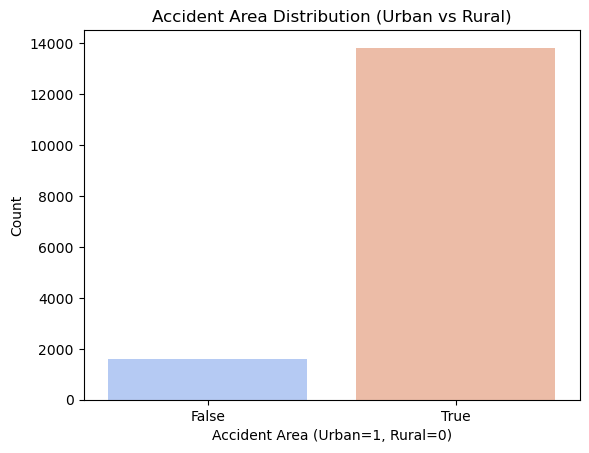

In [43]:
# Distribution of AccidentArea_Urban
sns.countplot(data=df, x='AccidentArea_Urban', palette='coolwarm')
plt.title('Accident Area Distribution (Urban vs Rural)')
plt.xlabel('Accident Area (Urban=1, Rural=0)')
plt.ylabel('Count')
plt.show()

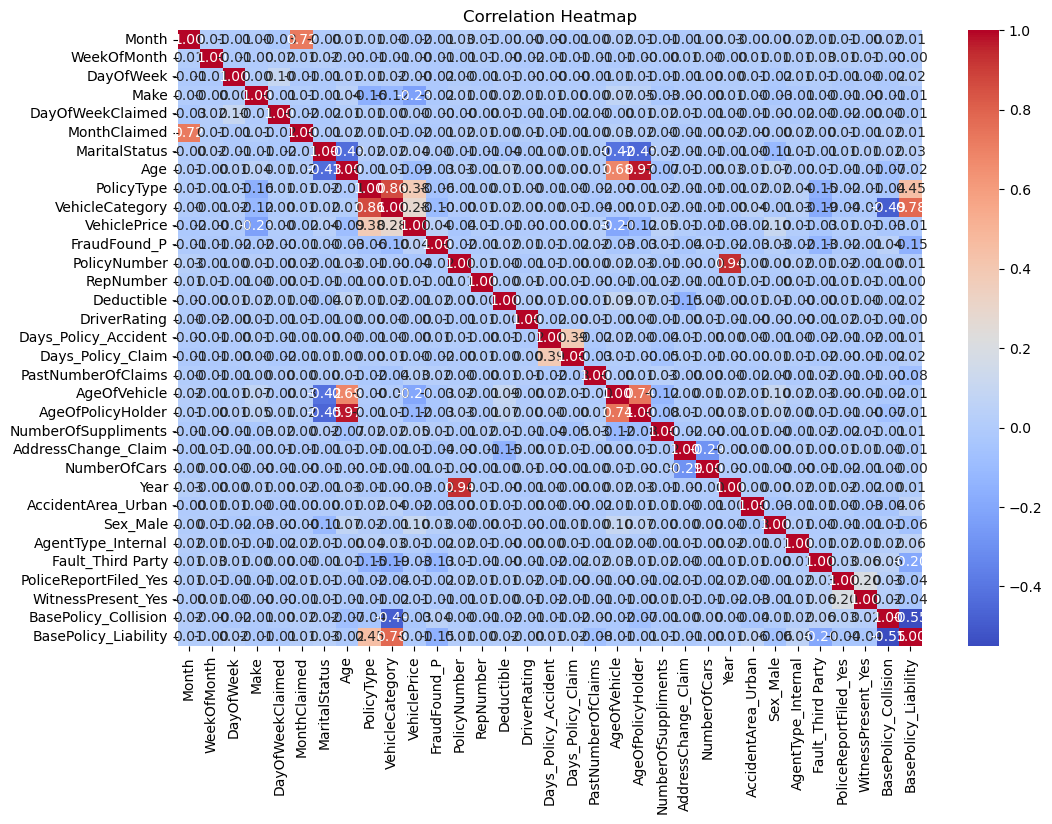

In [44]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

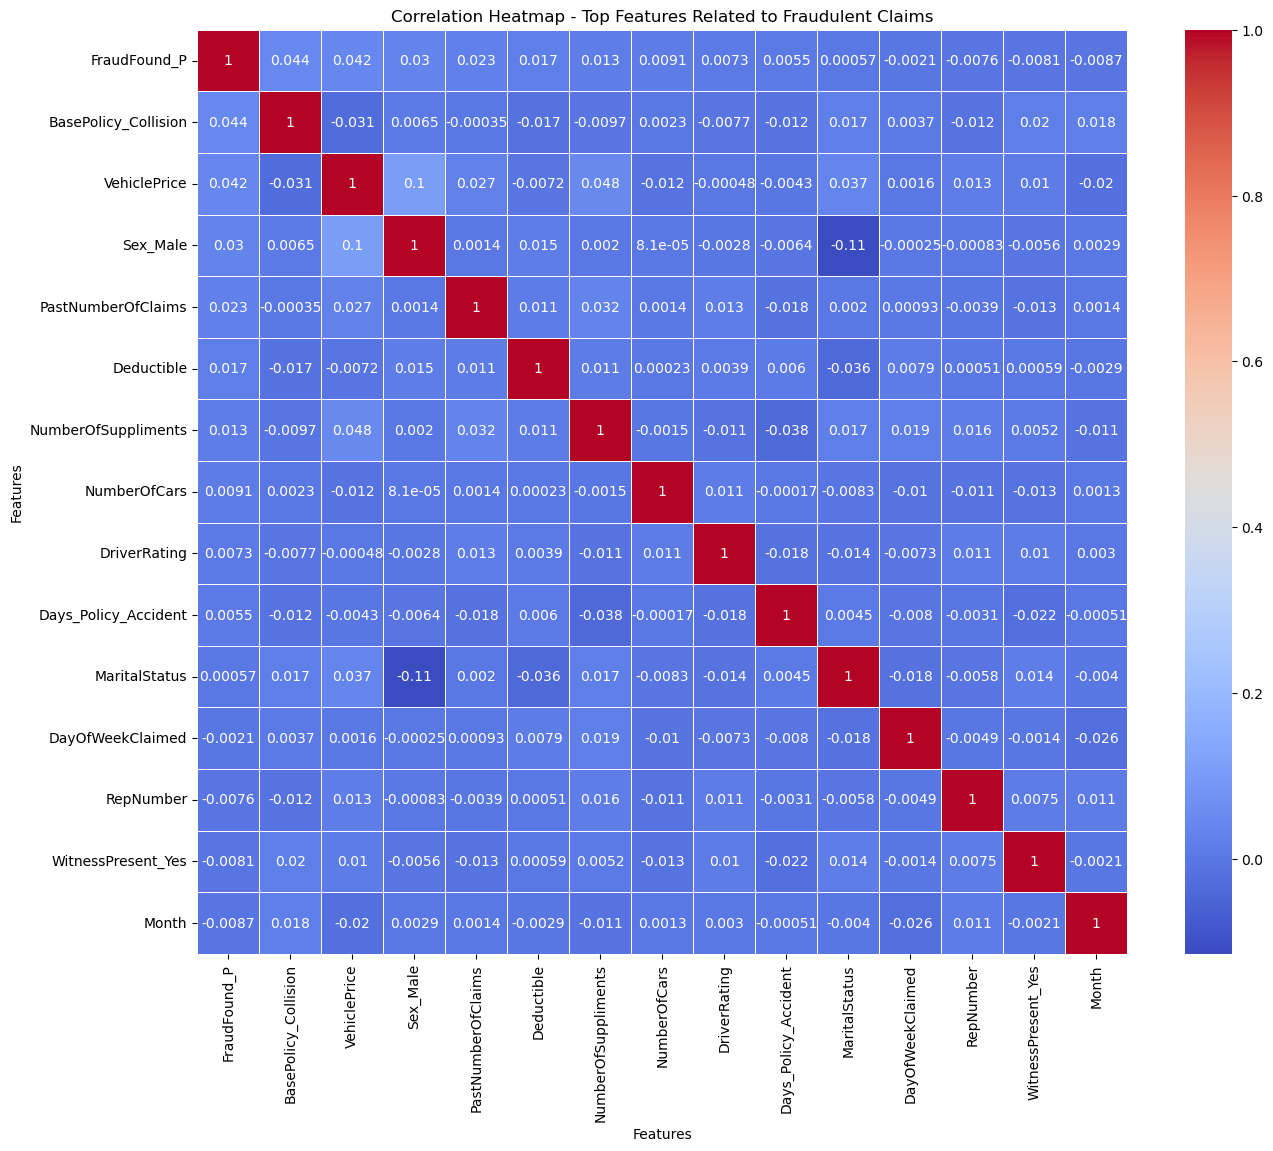

In [45]:
corr_with_fraud = df.corr()['FraudFound_P'].sort_values(ascending=False)

# Select top N features based on correlation with Attrition
top_features = corr_with_fraud.index[:15]

# Create heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(df[top_features].corr(), annot=True, cmap="coolwarm", linewidths=0.5, linecolor="white")
plt.title('Correlation Heatmap - Top Features Related to Fraudulent Claims')
plt.xlabel('Features')
plt.ylabel('Features')

plt.savefig('fraud_correlation_heatmap.png', dpi=300, bbox_inches='tight')

# Show the heatmap
plt.show()

In [46]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X, y = smote.fit_resample(X, y)

In [47]:
X

,Month,WeekOfMonth,DayOfWeek,Make,DayOfWeekClaimed,MonthClaimed,MaritalStatus,Age,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,AccidentArea_Urban,Sex_Male,AgentType_Internal,Fault_Third Party,PoliceReportFiled_Yes,WitnessPresent_Yes,BasePolicy_Collision,BasePolicy_Liability
0,2,5,6,6,6,5,2,-1.397554,5,1,2.326977,1,12,-2.450633,1,3,2,3,3,3,3,0,2,-1.078658,True,False,False,False,False,False,False,True
1,4,3,6,6,2,5,2,-0.434015,4,1,2.326977,2,15,-0.175298,4,3,2,3,6,4,3,3,0,-1.078658,True,True,False,False,True,False,True,False
2,10,5,0,6,5,10,1,0.529523,4,1,2.326977,3,7,-0.175298,3,3,2,0,7,6,3,3,0,-1.078658,True,True,False,False,False,False,True,False
3,6,2,2,17,1,6,1,1.863653,2,1,-0.596009,4,4,-0.175298,2,3,2,0,8,7,2,3,0,-1.078658,False,True,False,True,True,False,False,True
4,4,5,1,6,6,4,2,-0.952844,4,1,2.326977,5,3,-0.175298,1,3,2,3,5,4,3,3,0,-1.078658,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28989,3,1,2,2,5,4,1,-0.552726,0,0,-0.526496,1078,4,-0.175298,2,3,2,1,6,4,2,3,0,-1.078658,True,True,False,False,False,False,True,False
28990,7,2,0,0,2,8,1,0.456468,0,0,2.322208,10703,6,-0.175298,2,3,2,1,7,6,0,3,0,0.166227,True,True,False,False,False,False,True,False
28991,2,1,2,12,1,3,1,-0.615882,1,0,-0.032068,8376,1,-0.175298,2,3,2,1,7,4,0,3,0,0.166227,True,True,False,False,False,False,True,False
28992,5,1,2,12,2,6,1,-0.234234,1,0,0.627158,13398,8,-0.175298,1,3,2,0,6,4,3,3,0,1.411112,True,True,False,False,False,False,True,False


In [48]:
y.value_counts()

FraudFound_P
0    14497
1    14497
Name: count, dtype: int64

In [49]:
y

0        0
1        0
2        0
3        0
4        0
        ..
28989    1
28990    1
28991    1
28992    1
28993    1
Name: FraudFound_P, Length: 28994, dtype: int64

### Training Model for Prediction

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [53]:
y_pred = logreg.predict(X_test)

In [54]:
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8315226763235041
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      2899
           1       0.81      0.87      0.84      2900

    accuracy                           0.83      5799
   macro avg       0.83      0.83      0.83      5799
weighted avg       0.83      0.83      0.83      5799

Confusion Matrix:
[[2308  591]
 [ 386 2514]]


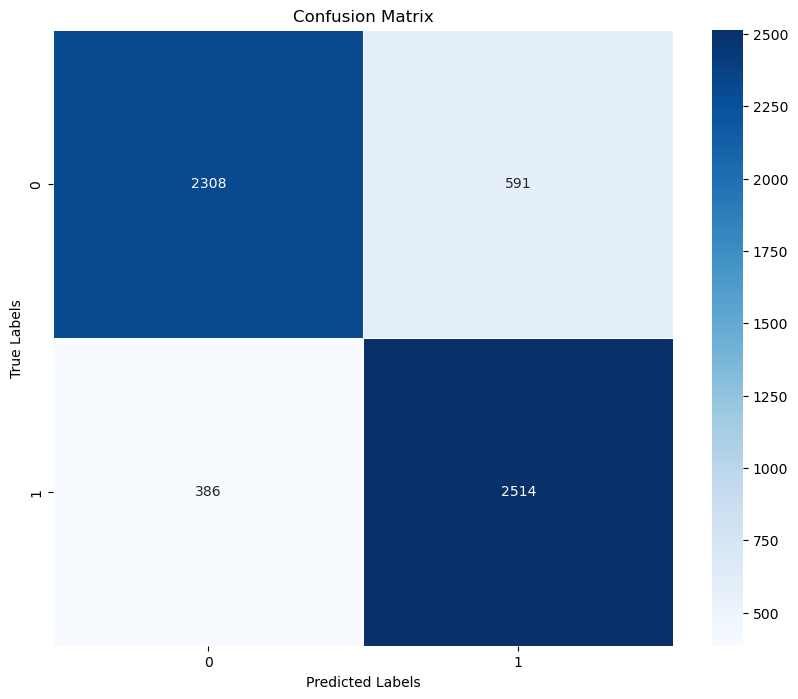

In [55]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.savefig('logreg_cm.png', dpi=300, bbox_inches='tight')
plt.show()

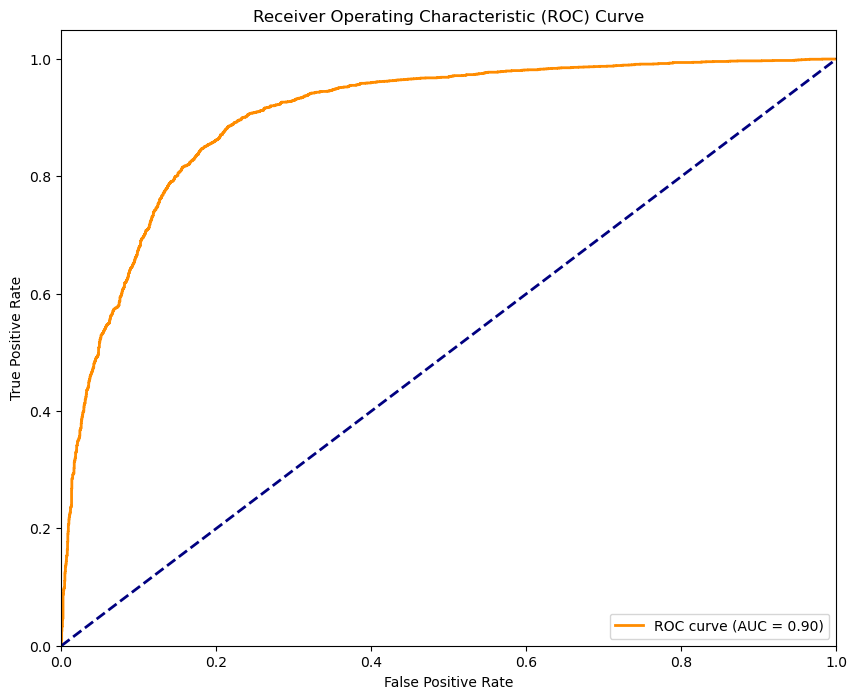

In [56]:
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.savefig('logreg_roc.png', dpi=300, bbox_inches='tight')

plt.show()

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [58]:
y_pred = rf_clf.predict(X_test)

In [59]:
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9653388515261252
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2899
           1       0.98      0.95      0.96      2900

    accuracy                           0.97      5799
   macro avg       0.97      0.97      0.97      5799
weighted avg       0.97      0.97      0.97      5799

Confusion Matrix:
[[2834   65]
 [ 136 2764]]


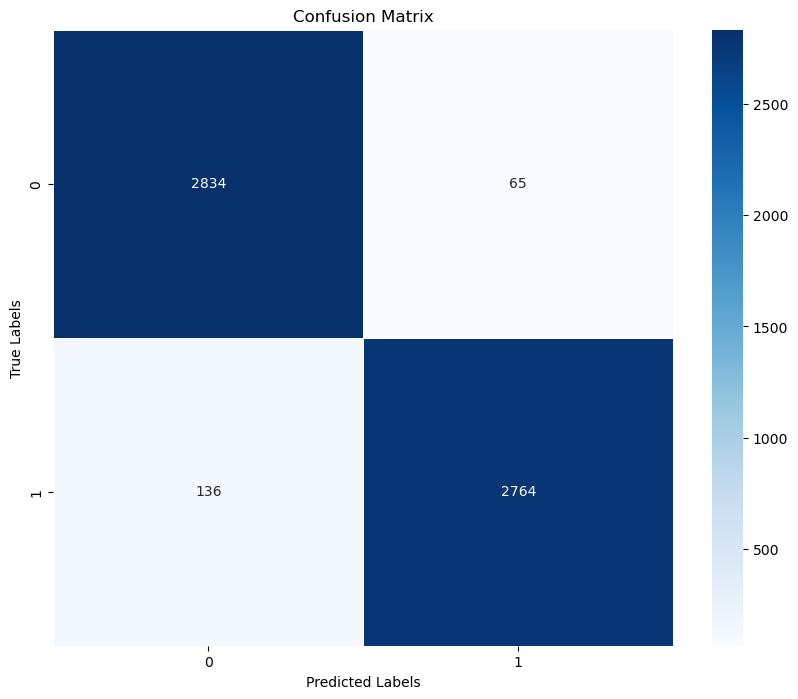

In [60]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.savefig('rf_cm.png', dpi=300, bbox_inches='tight')

plt.show()

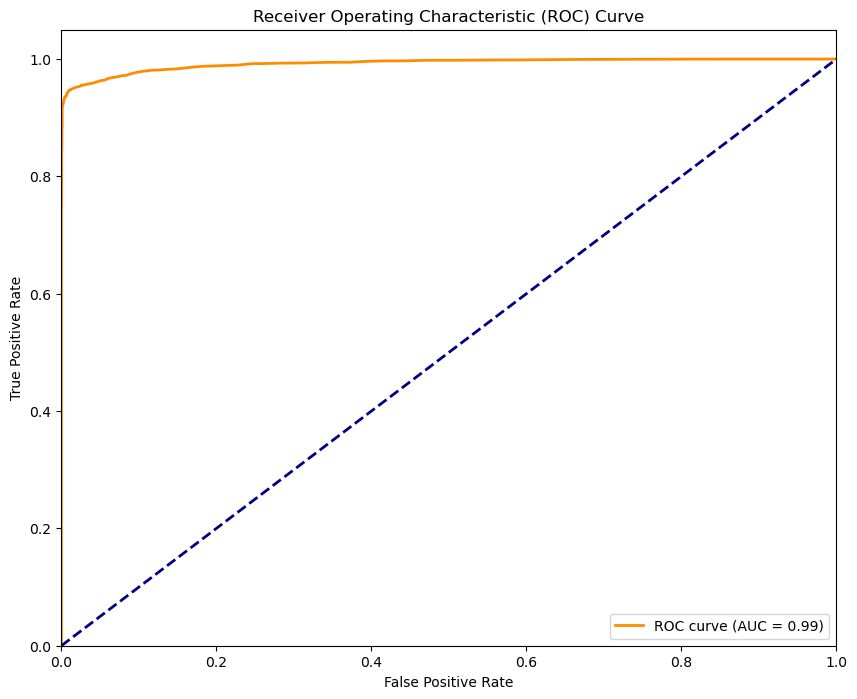

In [61]:
# Plot ROC curve (if needed)
y_pred_proba = rf_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.savefig('rf_roc.png', dpi=300, bbox_inches='tight')

plt.show()

In [62]:
feature_importance = rf_clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
                  Feature  Importance
8              PolicyType    0.091933
10           VehiclePrice    0.079565
9         VehicleCategory    0.079183
27      Fault_Third Party    0.063609
18           AgeOfVehicle    0.056715
30   BasePolicy_Collision    0.054586
3                    Make    0.054540
31   BasePolicy_Liability    0.050824
11           PolicyNumber    0.044946
7                     Age    0.037779
6           MaritalStatus    0.033627
14           DriverRating    0.030638
4        DayOfWeekClaimed    0.029733
12              RepNumber    0.029165
13             Deductible    0.027542
21    AddressChange_Claim    0.026294
0                   Month    0.025016
5            MonthClaimed    0.024431
19      AgeOfPolicyHolder    0.023816
2               DayOfWeek    0.023325
17     PastNumberOfClaims    0.022814
25               Sex_Male    0.022784
20    NumberOfSuppliments    0.018179
1             WeekOfMonth    0.017743
23                   Year    0